In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from tobii_pytracker.analyze.data_loader import DataLoader
from tobii_pytracker.configs.custom_config import CustomConfig

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

from tobii_pytracker.analyze.models import (
    HeatmapAnalyzer,
    FocusMapAnalyzer,
    FixationAnalyzer,
    SaccadeAnalyzer,
    EntropyAnalyzer,
    ClusterAnalyzer,
    ConceptAnalyzer,
    ScanpathsAnalyzer,
    VoiceTranscription
)


config = CustomConfig('../configs/config.yaml')
loader = DataLoader(config, root='../')

▶ Global heatmap statistics


,avg_gaze_x,avg_gaze_y,gaze_count
0,122.990196,-143.77451,102


▶ Per-set statistics


,set_name,avg_gaze_x,avg_gaze_y,gaze_count
0,20251105_114523,115.142857,-141.011905,84
1,20251105_114824,159.611111,-156.666667,18


▶ Per-slide statistics


,set_name,slide_index,avg_gaze_x,avg_gaze_y,gaze_count
0,20251105_114523,0,115.142857,-141.011905,84
1,20251105_114824,0,159.611111,-156.666667,18


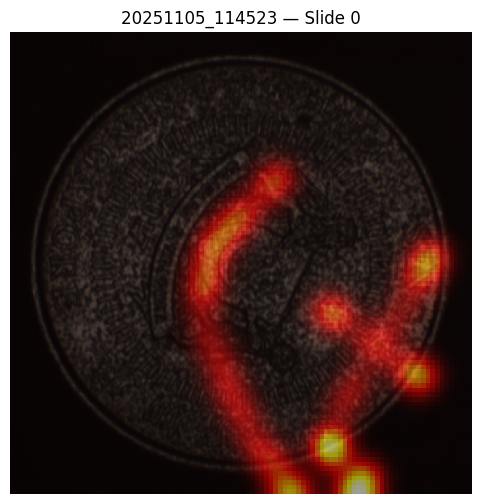

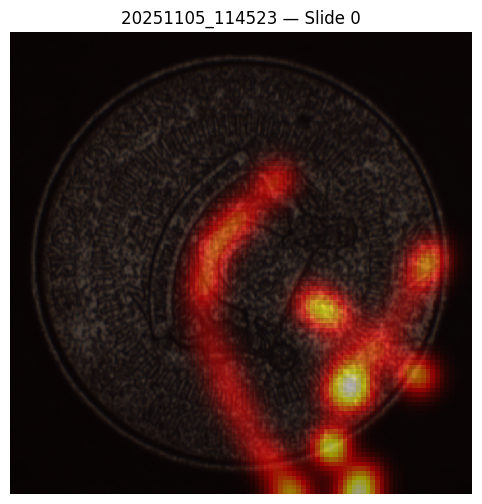

In [4]:
# Assuming you already have the data
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

analyzer = HeatmapAnalyzer(output_folder=output_dir)

# --- Global ---
print("▶ Global heatmap statistics")
global_stats = analyzer.analyze(background_data, per="global")
display(global_stats)

# --- Set-level ---
print("▶ Per-set statistics")
set_stats = analyzer.analyze(background_data, per="set")
display(set_stats.head())

# --- Slide-level ---
print("▶ Per-slide statistics")
slide_stats = analyzer.analyze(background_data, per="slide")
display(slide_stats.head())

# --- Plot heatmap for one image ---
example_slide = background_data.iloc[0]
subset = background_data[
    (background_data["set_name"] == example_slide["set_name"]) &
    (background_data["slide_index"] == example_slide["slide_index"])
]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

analyzer.plot_analysis(
    background_data=subset,
    screenshot_path=screenshot_path,
    title=f"{example_slide['set_name']} — Slide {example_slide['slide_index']}",
)


analyzer.plot_analysis(
    background_data=background_data,
    screenshot_path=screenshot_path,
    title=f"{example_slide['set_name']} — Slide {example_slide['slide_index']}",
)


▶ Global focus map statistics


,avg_gaze_x,avg_gaze_y,gaze_count
0,122.990196,-143.77451,102


▶ Per-set statistics


,set_name,avg_gaze_x,avg_gaze_y,gaze_count
0,20251105_114523,115.142857,-141.011905,84
1,20251105_114824,159.611111,-156.666667,18


▶ Per-slide statistics


,set_name,slide_index,avg_gaze_x,avg_gaze_y,gaze_count
0,20251105_114523,0,115.142857,-141.011905,84
1,20251105_114824,0,159.611111,-156.666667,18


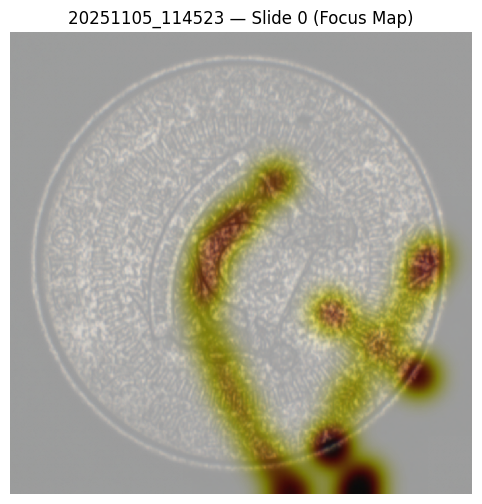

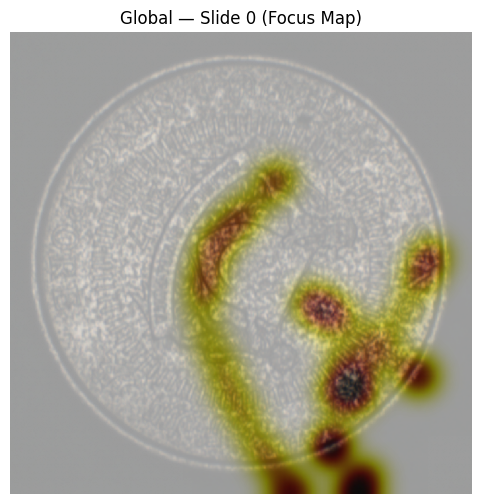

In [5]:
# --- Prepare background data ---
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

analyzer = FocusMapAnalyzer(output_folder=output_dir)

# --- Global ---
print("▶ Global focus map statistics")
global_stats = analyzer.analyze(background_data, per="global")
display(global_stats)

# --- Set-level ---
print("▶ Per-set statistics")
set_stats = analyzer.analyze(background_data, per="set")
display(set_stats.head())

# --- Slide-level ---
print("▶ Per-slide statistics")
slide_stats = analyzer.analyze(background_data, per="slide")
display(slide_stats.head())

# ============================================================
# 🖼 Plot focus map for one example slide
# ============================================================

example_slide = background_data.iloc[0]
subset = background_data[
    (background_data["set_name"] == example_slide["set_name"]) &
    (background_data["slide_index"] == example_slide["slide_index"])
]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

# --- Focus map for single slide (individual subject) ---
analyzer.plot_analysis(
    background_data=subset,
    screenshot_path=screenshot_path,
    title=f"{example_slide['set_name']} — Slide {example_slide['slide_index']} (Focus Map)",
)

# --- Focus map using all gaze data for this slide (across subjects) ---
analyzer.plot_analysis(
    background_data=background_data,
    screenshot_path=screenshot_path,
    title=f"Global — Slide {example_slide['slide_index']} (Focus Map)",
)

▶ Detecting saccades...


,set_name,slide_index,start_time,end_time,duration,x_start,y_start,x_end,y_end,amplitude,peak_velocity,mean_velocity,mean_acceleration
0,20251105_114523,0,9.137279,10.462995,1.341926,61.0,138.0,143.0,-78.0,231.041122,1893.187931,739.983601,20050.175930
1,20251105_114523,0,10.494636,10.654140,0.175345,147.0,-81.0,292.0,-181.0,176.139150,2368.490827,1027.274453,28221.556630
2,20251105_114523,0,10.941736,10.941736,0.015700,308.0,10.0,308.0,10.0,0.000000,0.000000,0.000000,54510.058991
3,20251105_114523,0,10.973915,11.324735,0.367500,306.0,10.0,145.0,-300.0,349.315044,1949.678262,973.358544,15456.763646
4,20251105_114824,0,8.446038,8.588794,0.158974,116.0,-67.0,189.0,-212.0,162.339151,1915.243206,1002.107524,23910.740315


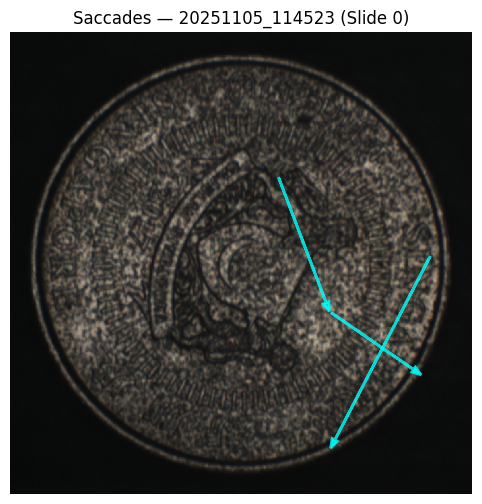

In [9]:
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

saccade_analyzer = SaccadeAnalyzer(
    output_folder=output_dir,
    method="ivt",               # "ivt" (velocity-based) or "acceleration"
    velocity_threshold=120.0,   # pixels/sec
    acceleration_threshold=6000.0,  # pixels/sec^2
    min_duration=0.015,         # seconds
)

print("▶ Detecting saccades...")
saccades = saccade_analyzer.analyze(background_data)
display(saccades.head())

example_slide = background_data.iloc[0]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

saccade_analyzer.plot_analysis(
    saccades=saccades,
    screenshot_path=screenshot_path,
    set_name=example_slide["set_name"],
    slide_index=example_slide["slide_index"],
    title=f"Saccades — {example_slide['set_name']} (Slide {example_slide['slide_index']})",
)

▶ Detecting fixations...


,fix_start,fix_end,duration,x_mean,y_mean,dispersion,set_name,slide_index
0,9.103856,9.203849,0.099993,44.166667,122.833333,105.0,20251105_114523,0
1,9.222142,9.304273,0.082131,-13.000000,64.800000,64.0,20251105_114523,0
2,9.321185,9.404125,0.082940,-45.600000,16.800000,64.0,20251105_114523,0
3,9.421029,9.521231,0.100202,-59.833333,-56.166667,90.0,20251105_114523,0
4,9.822936,9.984042,0.161106,106.000000,-367.000000,111.0,20251105_114523,0


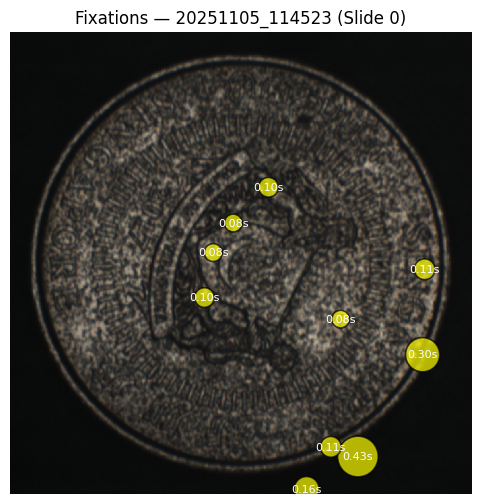

In [8]:
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

fixation_analyzer = FixationAnalyzer(
    output_folder=output_dir,
    method="dispersion",           # or "velocity"
    dispersion_threshold=60.0,     # pixels
    min_duration=0.08,             # seconds
)

print("▶ Detecting fixations...")
fixations = fixation_analyzer.analyze(background_data)
display(fixations.head())

example_slide = background_data.iloc[0]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

fixation_analyzer.plot_analysis(
    fixations=fixations,
    screenshot_path=screenshot_path,
    set_name=example_slide["set_name"],
    slide_index=example_slide["slide_index"],
    title=f"Fixations — {example_slide['set_name']} (Slide {example_slide['slide_index']})",
)